![euroscipy-logo](../asset/euroscipy2022-logo.png)

# Linear Algebra with Scipy


*Reading time ~45 min*

- *Authored by*: [Vincent Maladiere](https://github.com/Vincent-Maladiere)
- *Reviewed by*: [Julien Jerphanion](https://github.com/jjerphan), [Guillaume Lemaitre](https://github.com/glemaitre)
- *Credits*: [Scipy linalg Tutorial](https://docs.scipy.org/doc/scipy/tutorial/linalg.html), [Scikit-Learn Tutorial](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py)


`scipy.linalg` provide efficient linear algebra operation through BLAS and LAPACK backend. Input and ouput expect object that can be converted to 2-D arrays.

### BLAS & LAPACK

BLAS (Basic Linear Algebra Subroutine) is the standard specification for Linear Algebra. Many CPU-based distributions such as: OpenBLAS, ATLAS, MKL or BLIS, specialized for different hardwares. Also GPGPU distributions like cuBLAS. [BLAS functions](https://docs.scipy.org/doc/scipy/reference/linalg.blas.html) are categorized into 3 types of routines:
 
**Level 1:** <br>
Vector operations: $y \leftarrow \alpha x + y$, called `axpy` ("a x plus y"), also dot products and norms. Complexity in $O(N)$.


**Level 2:** <br>
Matrix - vector operations: $y \leftarrow \alpha A x + \beta y$ through a generalized matrix-vector multiplication `gemv`. <br>
Also solving the equation $Tx = y$ with $T$ being triangular. Complexity in $O(N^2)$.


**Level 3:** <br>
Matrix - Matrix operations: $C \leftarrow \alpha AB + \beta C$ through generalized matrix multiplication `gemm`. <br>
Used to inverse matrix as well. Complexity in $O(N^3)$.


LAPACK (Linear Algebra Package) is another standard based on BLAS level 3. It implements linear equations solvers, linear least squares and eigen values decompositions.


### Numpy linalg vs Scipy linalg

> `scipy.linalg` contains all the functions in `numpy.linalg`. plus some other more advanced ones not contained in `numpy.linalg`.

> Another advantage of using `scipy.linalg` over `numpy.linalg` is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional. Therefore, the scipy version might be faster depending on how numpy was installed.


In [18]:
import scipy
from scipy import linalg
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
scipy.show_config()

lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/arm64-builds/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/arm64-builds/lib']
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/arm64-builds/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/arm64-builds/lib']
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/arm64-builds/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/arm64-builds/lib']
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/opt/arm64-builds/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/opt/arm64-builds/lib']


## Standard operations

We will review some of the pillar methods of linear algebra for matrices:
- The **determinant** is mostly used for determining if a matrix is singular and to compute the matrix inverse otherwise.
- The **inverse** of a matrix is a very common operator in fields like machine learning and optimizations.
- **Eigenvalues** and **eigenvectors** characterizes a matrix. Roughly speaking, the eigenvalues of a linear mapping is a measure of the distortion induced by the transformation and the eigenvectors tell you about how the distortion is oriented
- **Singularvalues** of a matrix $X$ are the square root of the eigenvalues of $X^{\top}X$, and are very useful to perform matrix decomposition (SVD).

### Finding the determinant

The determinant of a square matrix $A$ is often denoted $|A|$ and is a quantity often used in linear algebra.

2 computation techniques:

**1. Leibniz formula**

$$A=\begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3} \\ a_{2,1} & a_{2,2} & a_{2,3} \\ a_{3,1} & a_{3,2} & a_{3, 3}\end{bmatrix}$$

<br>

| Permutation $\sigma$ | ${sgn}(\sigma )$ | $sgn(\sigma) \prod _{i=1}^{n}a_{i,\sigma _{i}}$ |
|--------------------------------------|-----------------------------------------------|--------------------------------------------------------------------------------|
| 1, 2, 3                              | $+1$                           | $+a_{1,1}a_{2,2}a_{3,3}$                                        |
| 1, 3, 2                              | $-1$                           | $-a_{1,1}a_{2,3}a_{3,2}$                                        |
| 3, 1, 2                              | $+1$                           | $+a_{1,3}a_{2,1}a_{3,2}$                                        |
| 3, 2, 1                              | $-1$                           | $-a_{1,3}a_{2,2}a_{3,1}$                                        |
| 2, 3, 1                              | $+1$                           | $+a_{1,2}a_{2,3}a_{3,1}$                                        |
| 2, 1, 3                              | $-1$                           | ${-a_{1,2}a_{2,1}a_{3,3}}$                                        |


The sign of $\sigma$  is defined to be $+1$ whenever the reordering given by $\sigma$ can be achieved by successively interchanging two entries an even number of times, and $-1$ whenever it can be achieved by an odd number of such interchanges.


$$\det(A) = \sum_{\sigma \in S_n} \Big( sgn(\sigma) \prod^n_{i=1} a_{i,\sigma_i} \Big) = a_{1,1}a_{2,2}a_{3,3} - a_{1,1}a_{2,3}a_{3,2} + a_{1,3}a_{2,1}a_{3,2} - a_{1,3}a_{2,2}a_{3,1} + a_{1,2}a_{2,3}a_{3,1} - a_{1,2}a_{2,1}a_{3,3}$$

**2. Laplace expansion**

![laplace-expansion](../asset/laplaceexpansion.png)

Suppose  $a_{ij}$ are the elements of the matrix $A$ and let $M_{ij}=|A_{ij}|$ be the determinant of the matrix left by removing the $i$ row and $j$ column from $A$. Then, for any column $j$:

$$\det(A)=\sum_{i=1}^N (-1)^{i+j} a_{ij} M_{ij}$$

This is a recursive way to define the determinant, where the base case is defined by accepting that the determinant of a $1 \times 1$ matrix is the only matrix element.

In Scipy:

In [19]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
print(A, "\n")
print("det:", linalg.det(A))

[[1 3 5]
 [2 5 1]
 [2 3 8]] 

det: -25.000000000000004


In [20]:
A_singular = np.array([[1, 3, 5], [2, 6, 10], [2, 3, 8]])
print(A_singular, "\n")
print("det:", linalg.det(A_singular))

[[ 1  3  5]
 [ 2  6 10]
 [ 2  3  8]] 

det: 1.77635683940025e-15


### Finding the inverse

The inverse of a matrix $A$ is the matrix $B$, such that $AB = I$, where $I$ is the identity matrix consisting of ones down the main diagonal. Usually, $B$ is denoted  $B=A^{-1}$.

In SciPy, the matrix inverse of the NumPy array, A, is obtained using `linalg.inv(A)`, or using `A.I` if `A` is a Matrix. 

Under the hood, it performs [Gaussian elimination](https://en.wikipedia.org/wiki/Invertible_matrix#Gaussian_elimination), via [Lower-Upper decomposition](https://en.wikipedia.org/wiki/LU_decomposition).

For example:

$$A=\begin{bmatrix} 1 & 3 & 5 \\ 2 & 5 & 1 \\ 2 & 3 & 8 \end{bmatrix}$$

In [21]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
A_inv = linalg.inv(A)
print(A, "\n")
print(A_inv, "\n")
print(A.dot(A_inv))

[[1 3 5]
 [2 5 1]
 [2 3 8]] 

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]] 

[[ 1.00000000e+00 -1.11022302e-16  4.85722573e-17]
 [ 3.05311332e-16  1.00000000e+00  7.63278329e-17]
 [ 2.22044605e-16 -1.11022302e-16  1.00000000e+00]]


Dot product alternatives:

In [22]:
print(np.dot(A, A_inv), "\n")
print(A @ A_inv)

[[ 1.00000000e+00 -1.11022302e-16  4.85722573e-17]
 [ 3.05311332e-16  1.00000000e+00  7.63278329e-17]
 [ 2.22044605e-16 -1.11022302e-16  1.00000000e+00]] 

[[ 1.00000000e+00 -1.11022302e-16  4.85722573e-17]
 [ 3.05311332e-16  1.00000000e+00  7.63278329e-17]
 [ 2.22044605e-16 -1.11022302e-16  1.00000000e+00]]


**TODO #1**: Try to perform inversion on `A_singular`. What result do you expect?

In [23]:
### TODO - write your code below ###


In practice, we don't use the inverse but the pseudo inverse `pinv`.

In [30]:
linalg.pinv(A_singular)

array([[-0.05319149, -0.10638298,  0.20212766],
       [ 0.16595745,  0.33191489, -0.5106383 ],
       [-0.04893617, -0.09787234,  0.26595745]])

In [31]:
A_singular @ linalg.pinv(A_singular) @ A_singular

array([[ 1.,  3.,  5.],
       [ 2.,  6., 10.],
       [ 2.,  3.,  8.]])

### Solving a linear system

Suppose we have the following equations to solve:
    
$$x + 3y + 5z = 10 \\ 2x + 5y + z = 8 \\ 2x + 3y + 8z = 3$$

We could turn this problem into matrix computation:

$$\begin{bmatrix} 1 & 3 & 5 \\ 2 & 5 & 1 \\ 2 & 3 & 8 \end{bmatrix} \begin{bmatrix}x\\y\\z\end{bmatrix}=\begin{bmatrix}10\\8\\3\end{bmatrix}$$

Thus our problem is now:

$$\begin{bmatrix}x\\y\\z\end{bmatrix} = \begin{bmatrix} 1 & 3 & 5 \\ 2 & 5 & 1 \\ 2 & 3 & 8 \end{bmatrix}^{-1} \begin{bmatrix}10\\8\\3\end{bmatrix} $$

**TODO #2**: Solve the problem using only `linalg.inv`

In [ ]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
b = np.array([[10], [8], [3]])

### TODO - write your code below ###


However, it is better to use the `linalg.solve` command, which can be faster and more numerically stable. In this case, it, however, gives the same answer as shown in the following example:

In [ ]:
x = linalg.solve(A, b)
x

Check:

In [ ]:
A @ x - b

### Norms

A wide range of norm definitions are available using different parameters to the order argument of `linalg.norm`. This function takes a rank-1 (vectors) or a rank-2 (matrices) array and an optional order argument (default is 2). Based on these inputs, a vector or matrix norm of the requested order is computed.

For a vector

$$||x||=\begin{cases} max|x_i| & ord=inf\\ min|x_i| & ord=-inf \\ \big(\sum_i |x_i|^{ord} \big)^{1/ord} & ord < inf \end{cases}$$

For a matrix

$$||A||=\begin{cases} max_i \sum_j |a_{ij}| & ord = inf \\ min_i \sum_j |a_{ij}| & ord = -inf \\ max_j \sum_i |a_{ij}| & ord = 1\\ min_j \sum_i |a_{ij}| & ord = -1 \\ max\, \sigma_i & ord = 2 \\ max \,\sigma_j & ord = -2 \\ \sqrt{\mathrm{trace}(A^{\top}A}) & ord = \mathrm{"fro"}\end{cases}$$

In [ ]:
A

In [ ]:
A[0]

In [ ]:
print(linalg.norm(A[0], np.inf))
print(linalg.norm(A[0], -np.inf))
print(linalg.norm(A[0], 2))

In [ ]:
print(linalg.norm(A))  # frobenius "fro" is the default
print(linalg.norm(A, np.inf))
print(linalg.norm(A, 1))
print(linalg.norm(A, 2))

### Eigenvalues and engenvectors

The eigenvalue-eigenvector problem is one of the most commonly employed linear algebra operations. In one popular form, the eigenvalue-eigenvector problem is to find for some square matrix $A$, scalars $\lambda$ and corresponding vectors $v$, such that:

$$A v = \lambda v$$

For an $N \times N$ matrix, there are  (not necessarily distinct) eigenvalues — roots of the (characteristic) polynomial

$$| A - \lambda I | = 0$$

Let's consider again the matrix:

$$A=\begin{bmatrix} 1 & 5 & 2 \\ 2 & 4 & 1 \\ 3 & 6 & 2 \end{bmatrix}$$

The characteristic polynomial is:

$$|A - \lambda I| = \begin{bmatrix} 1-\lambda & 5 & 2 \\ 2 & 4-\lambda & 1 \\ 3 & 6 & 2-\lambda \end{bmatrix} = (1-\lambda) [(4-\lambda)(2-\lambda)-6]-5[2(2-\lambda)-3]+2[12-3(4-\lambda)]\\=-\lambda^3+7\lambda^2+8\lambda-3$$ 

The roots of this polynomial are:

$$\lambda_1 = 7.9579\\\lambda_2 = -1.2577\\\lambda_3=0.2997$$

In [ ]:
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
la, v = linalg.eig(A)
print("lambdas:\n", la, "\n")
print("right v:\n", v)

Sanity check the initial equation $A v_i = \lambda_i v_i $

In [ ]:
for idx in range(3):
    print(linalg.norm(A @ v[:, idx] - la[idx] * v[:, idx]))

In [ ]:
A @ v

In [ ]:
la * v

In [ ]:
A @ v - la * v

**TODO #3**: Which operation `la * v` perform?

Eigenvectors are unitary (defining a orthonormal basis)

In [ ]:
(v**2)

In [ ]:
(v**2).sum(axis=0)

### Singular value decomposition (SVD)

Singular value decomposition (SVD) can be thought of as an extension of the eigenvalue problem to matrices that are not square. 

Let $A$ be a $N \times M$ matrix. $A^{\top} A$ and $A A ^{\top}$ are squared hermitian matrix of dimension $M \times M$ and $N \times N$. They are real, positive-definite matrix and hence invertible. 

Let's call their eigenvalues $\sigma_i^2$. The singular values of $A$ are then $\sigma_i$.

$A$ also admit the SVD decomposition:

$$A = U \Sigma V^{\top} $$

With 
- $\Sigma = diag(\sigma_1, \sigma_2, ..., \sigma_k)$
- $k = min(M, N)$.

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
n, m = A.shape
u, s, v = linalg.svd(A)
print(u, "\n")
print(s, "\n")
print(v, "\n")

In [ ]:
S = linalg.diagsvd(s, n, m)
S

**TODO #4** Check that the decomposition is correct by computing the Frobenius norm.

In [ ]:
### TODO - Write your code below ### 


### Exercice 1: Dataset decomposition

Let's now use eigenvalues to map features to lower input space. This means that we can shrink dimensions without loosing too much information, which is notably helpful for visualisation purposes.

We use data from the digit dataset, consisting in gray-scale value of images of hand-written digits:

<img src="../asset/hand-written-digits.png" alt="drawing" style="width:200px;"/>

For this task we will:
1. Center the data: $X_{center} = \{(X_j - \mu_j)\}_{j=1:m}$, i.e. compute the mean of each column and substract it: `X - X.mean(axis=0)`.
2. Scale the data: $X_{scaled} = \{(X_{center, j}/\sigma ^2_j)\}_{j=1:m}$, i.e. compute the standard deviation of each column and scale it: `X / X.std(axis=0)`. You will probably need to add a small epsilon to the denominator for numerical stability: `epsilon = 1e-16`
3. Compute the covariance matrix: $X_{center}^{\top} . X_{center}$: i.e. `X.T @ X`
4. Compute the eigenvalues `la` and eigenvectors `v` of the covariance matrix.
5. Transform your scaled data with a dot product of the eigenvectors: `X_trans = X_c @ u`

In [34]:
from sklearn import datasets
import plotly.express as px

In [91]:
X, y = datasets.load_digits(return_X_y=True)
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [92]:
y

array([0, 1, 2, ..., 8, 9, 8])

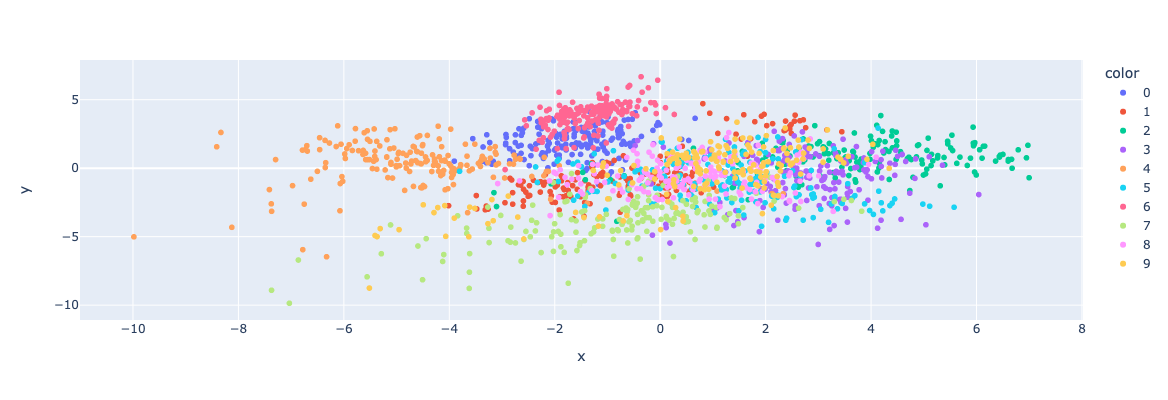

In [97]:
### TODO - Write your code below ###


### end of TODO ###

px.scatter(
    x=X_trans[:, 0],
    y=X_trans[:, 1],
    color=y.astype(str),
    width=800,
    height=400,
).show()

In scikit-learn, PCA we don't compute the huge Gram Matrix $X^{\top}.X$ Instead, we use a SVD from scipy.

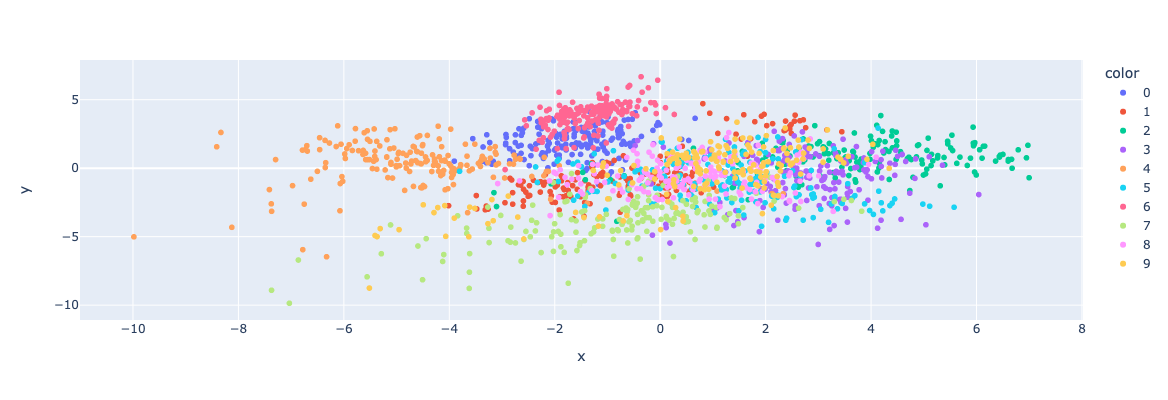

In [90]:
X, y = datasets.load_digits(return_X_y=True)

X_c = (X - X.mean(axis=0))/(X.std(axis=0)+1e-16)

u, s, v = linalg.svd(X_c, full_matrices=False)
X_trans = u * s

px.scatter(
    x=-X_trans[:, 0],
    y=-X_trans[:, 1],
    color=y.astype(str),
    width=800,
    height=400,
).show()

### Exercice 2: Implement your own PCA!

> PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns  components in its `fit` method, and can be used on new data to project it on these components [with the `transform` method].
[scikit learn doc](https://scikit-learn.org/stable/modules/decomposition.html#pca)

PCA is widely used in Machine Learning to reduce the dimensionality of a dataset and simplify the task of the downstream model. By doing so, it can also filter out some noise and avoid overfitting.

In what follows, your task is to implement a minimalistic PCA to reduce the dimensionality of a digit dataset. This dataset consists in gray-scale value of images of hand-written digits:

We will compare your performances with those of Scikit-Learn PCA by computing the accuracy of a k-Nearest Neighbors classifier. 


Your PCA class consists in 2 methods:

- `fit`:
    - Compute and store the u, s, v values
<br><br>


- `transform`:
    - Compute the dot product: $X_{trans}=X.v$. <br><br>
    
    Note that $X$ shape is $(N \times M)$, $v$ shape is $(M \times n_{components})$ and thus $X_{trans}$ shape is $(N \times n_{components})$

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as OriginalPCA
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def show_score(pca, X, y, title, switch_x=False):
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, stratify=y, random_state=0
    )
    
    pca.fit(X_train, y_train)
    
    # Fit the classifier on the PCA embeddings
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca.transform(X_train), y_train)
    
    # Get the accuracy score from the classifier
    acc_knn = knn.score(pca.transform(X_test), y_test)
    
    # Get embedding on the entire dataset for visualization purposes
    X_embedded = pca.transform(X)
    
    px.scatter(
        x=-X_embedded[:, 0] if switch_x else X_embedded[:, 0],
        y=X_embedded[:, 1],
        color=y.astype(str),
        width=800,
        height=400,
        title=f"{title} - KNN Accuracy: {acc_knn:.5f}"
    ).show()

In [ ]:
class PCA:
    def __init__(self, n_components, random_state=None):
        self.n_components = n_components
    
    def fit(self, X, y=None):
        ### TODO - Write your code below ###
        pass
    
    def transform(self, X, y=None):
        ### TODO - Write your code below ###
        return X

In [ ]:
# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

pca = make_pipeline(StandardScaler(), PCA(n_components=40, random_state=0))
pca_og = make_pipeline(StandardScaler(), OriginalPCA(n_components=40, random_state=0))

show_score(pca, X, y, "My PCA")
show_score(pca_og, X, y, "Scikit Learn PCA", switch_x=True)